# Dados de [brasil.io/dataset/covid19](https://brasil.io/dataset/covid19/caso_full/)

In [1]:
from datetime import date
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from ipywidgets import interact

%matplotlib inline
sns.set_style('whitegrid')

# pd.set_option('display.max_rows', 150)

In [2]:
br_io_casos_full = pd.read_csv('brasil.io-covid19-caso_full-2020-06-10-22.28.24.csv')
br_io_casos_full['date'] = pd.to_datetime(br_io_casos_full['date'], format='%Y-%m-%d')
br_io_casos_full.head()

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,24,2020-06-10,74,AC,Acrelândia,1200013.0,city,167,1094.65128,0,2,0,0.0120,15256.0,True,False
1,24,2020-06-10,41,AC,Assis Brasil,1200054.0,city,79,1065.12067,10,4,0,0.0506,7417.0,True,False
2,24,2020-06-10,33,AC,Brasiléia,1200104.0,city,176,669.76178,24,5,0,0.0284,26278.0,True,False
3,24,2020-06-10,64,AC,Bujari,1200138.0,city,90,876.68030,2,1,0,0.0111,10266.0,True,False
4,24,2020-06-10,34,AC,Capixaba,1200179.0,city,73,622.17677,0,2,1,0.0274,11733.0,True,False


In [3]:
br_io_casos_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190671 entries, 0 to 190670
Data columns (total 16 columns):
epidemiological_week                             190671 non-null int64
date                                             190671 non-null datetime64[ns]
order_for_place                                  190671 non-null int64
state                                            190671 non-null object
city                                             188237 non-null object
city_ibge_code                                   189289 non-null float64
place_type                                       190671 non-null object
last_available_confirmed                         190671 non-null int64
last_available_confirmed_per_100k_inhabitants    184184 non-null float64
new_confirmed                                    190671 non-null int64
last_available_deaths                            190671 non-null int64
new_deaths                                       190671 non-null int64
last_available_death_

In [4]:
list(br_io_casos_full.columns)

['epidemiological_week',
 'date',
 'order_for_place',
 'state',
 'city',
 'city_ibge_code',
 'place_type',
 'last_available_confirmed',
 'last_available_confirmed_per_100k_inhabitants',
 'new_confirmed',
 'last_available_deaths',
 'new_deaths',
 'last_available_death_rate',
 'estimated_population_2019',
 'is_last',
 'is_repeated']

## Inclusão dos dados antigos disponibilizados pelo Ministério da Saúde diretamente de [covid.saude.gov.br](covid.saude.gov.br)

In [5]:
dados_municipios_antigos = pd.read_csv('DADOS_MUNICIPIOS_ANTIGOS')
dados_municipios_antigos['datetime'] = pd.to_datetime(dados_municipios_antigos['datetime'], format='%Y-%m-%d')
dados_municipios_antigos.head()

,regiao,estado,municipio,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime,municipioEstado,contadorDiasCasos,contadorObitosCasos,casosNormalizado,obitosNormalizado
0,Norte,RO,Alta Floresta D'Oeste,2020-05-02,18,22945,1,0,0,0,0,0,2020-05-02,Alta Floresta D'Oeste-RO,1,0,43.58248,0.0
1,Norte,RO,Alta Floresta D'Oeste,2020-05-03,19,22945,1,0,0,0,0,0,2020-05-03,Alta Floresta D'Oeste-RO,2,0,43.58248,0.0
2,Norte,RO,Alta Floresta D'Oeste,2020-05-04,19,22945,1,0,0,0,0,0,2020-05-04,Alta Floresta D'Oeste-RO,3,0,43.58248,0.0
3,Norte,RO,Alta Floresta D'Oeste,2020-05-05,19,22945,1,0,0,0,0,0,2020-05-05,Alta Floresta D'Oeste-RO,4,0,43.58248,0.0
4,Norte,RO,Alta Floresta D'Oeste,2020-05-06,19,22945,1,0,0,0,0,0,2020-05-06,Alta Floresta D'Oeste-RO,5,0,43.58248,0.0


In [6]:
br_io_casos_full.loc[br_io_casos_full['city'].isin(['Rio de Janeiro'])].sort_values(by=['date']).head(300)

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
190644,10,2020-03-06,1,RJ,Rio de Janeiro,3304557.0,city,1,0.01488,1,0,0,0.0000,6718903.0,False,False
190635,10,2020-03-07,2,RJ,Rio de Janeiro,3304557.0,city,1,0.01488,0,0,0,0.0000,6718903.0,False,True
190624,11,2020-03-08,3,RJ,Rio de Janeiro,3304557.0,city,2,0.02977,1,0,0,0.0000,6718903.0,False,False
190609,11,2020-03-09,4,RJ,Rio de Janeiro,3304557.0,city,2,0.02977,0,0,0,0.0000,6718903.0,False,True
190592,11,2020-03-10,5,RJ,Rio de Janeiro,3304557.0,city,2,0.02977,0,0,0,0.0000,6718903.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21471,23,2020-06-06,93,RJ,Rio de Janeiro,3304557.0,city,35703,531.38139,660,4401,92,0.1233,6718903.0,False,False
16904,24,2020-06-07,94,RJ,Rio de Janeiro,3304557.0,city,36115,537.51334,412,4462,61,0.1235,6718903.0,False,False
12309,24,2020-06-08,95,RJ,Rio de Janeiro,3304557.0,city,36893,549.09261,778,4516,54,0.1224,6718903.0,False,False
7693,24,2020-06-09,96,RJ,Rio de Janeiro,3304557.0,city,37903,564.12483,1010,4599,83,0.1213,6718903.0,False,False


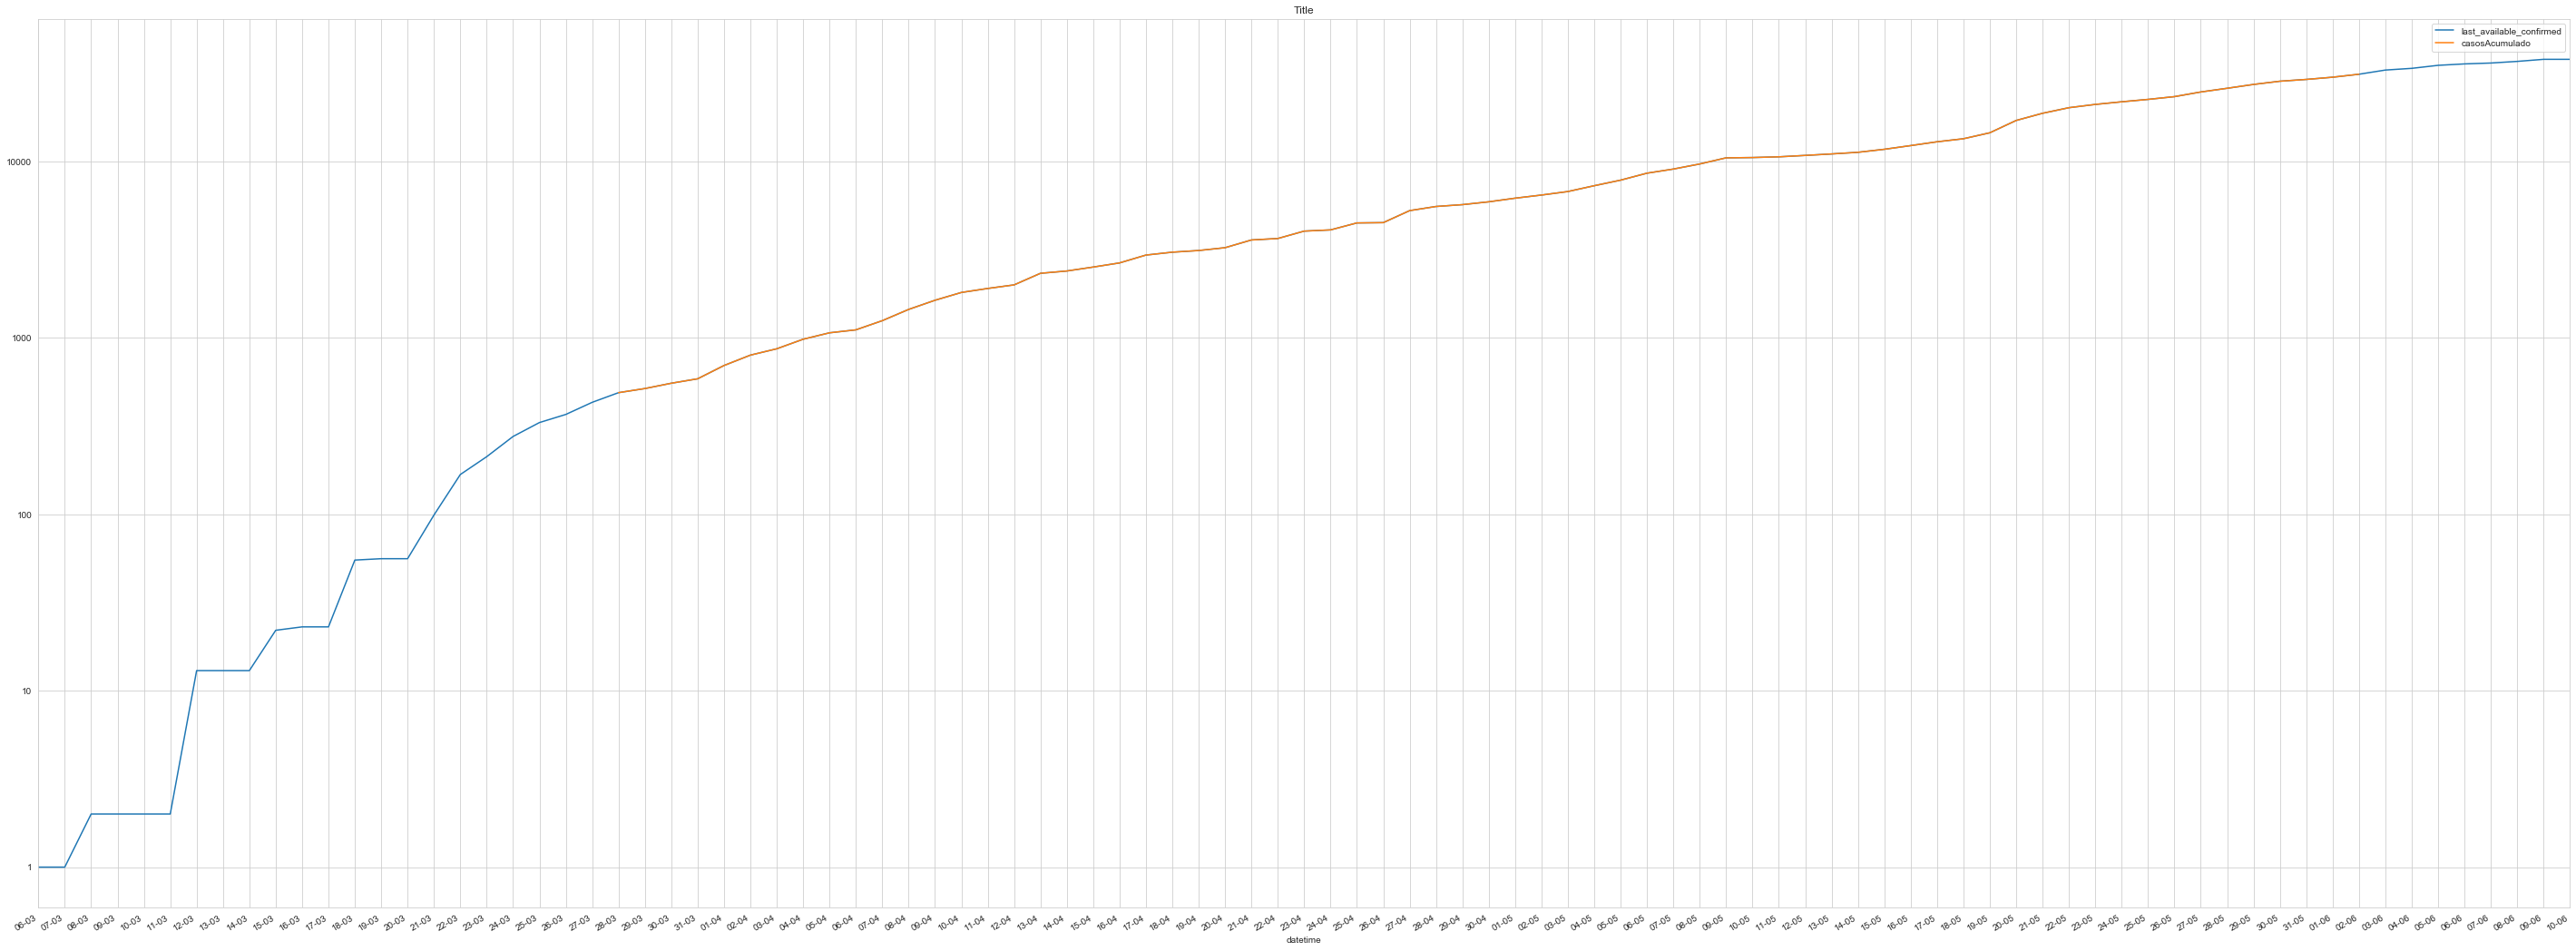

In [7]:
br_io_casos_full.loc[br_io_casos_full['city'].isin(['Rio de Janeiro'])]\
                .sort_values(by=['date'])\
                .groupby(['date'])['last_available_confirmed']\
                .sum()\
                .plot(figsize=(50,20), legend=True, logy=True, title="Title")

dados_municipios_antigos.loc[dados_municipios_antigos['municipioEstado'].isin(['Rio de Janeiro-RJ'])]\
                        .sort_values(by=['datetime'])\
                        .groupby(['datetime'])['casosAcumulado']\
                        .sum()\
                        .plot(figsize=(50,20), legend=True, logy=True, title="Title")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m')) # '%d-%m' dia-mês; %U or %W Week number of the year
plt.gca().xaxis.set_major_locator(mdates.DayLocator()) #mdates.DayLocator(); mdates.MonthLocator() determina a posição do tick quando se plota datas
plt.gcf().autofmt_xdate()
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

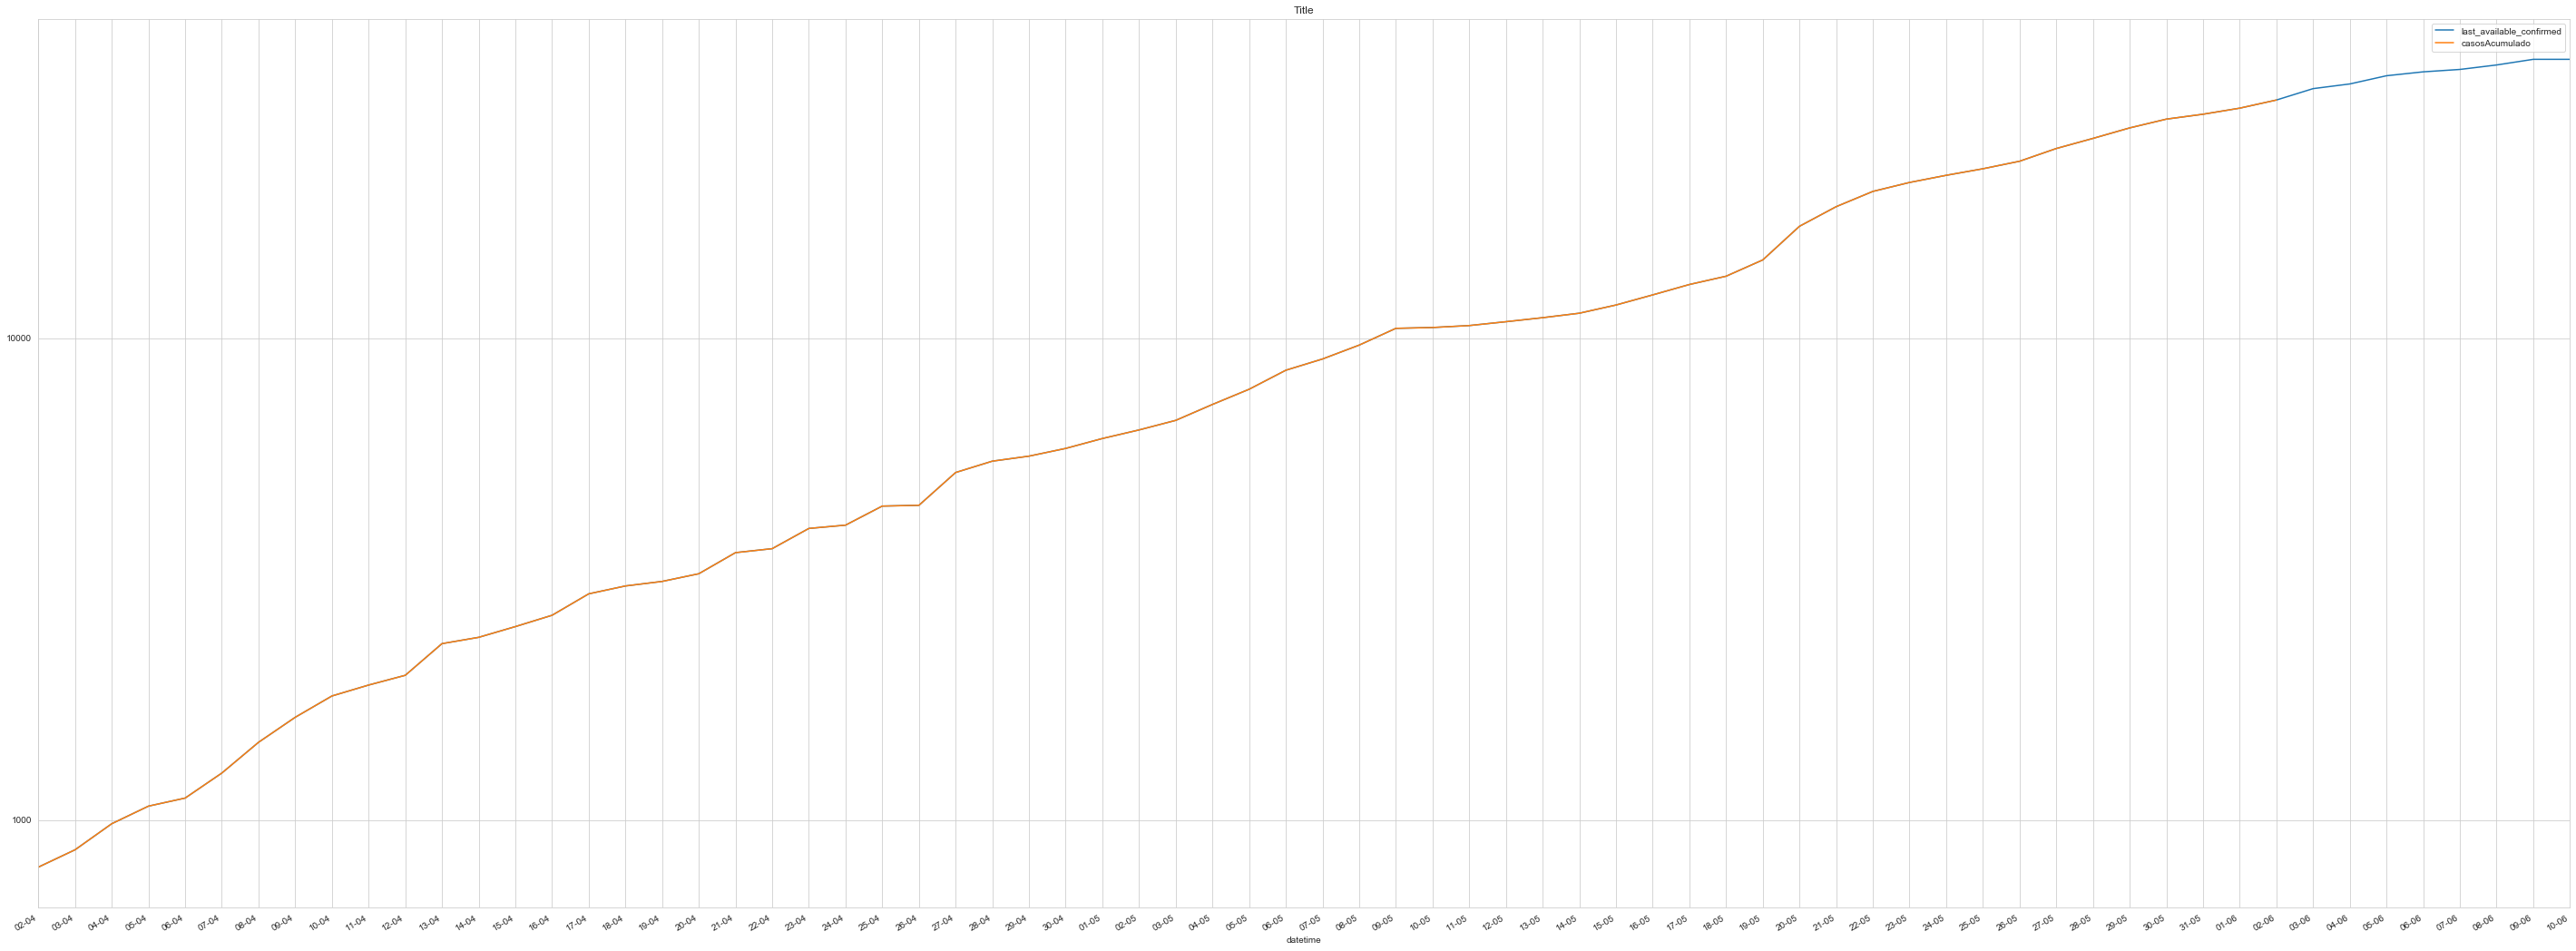

In [8]:
br_io_casos_full.loc[(br_io_casos_full['city'].isin(['Rio de Janeiro'])) & (br_io_casos_full['date'] > '2020-04-01')]\
                .sort_values(by=['date'])\
                .groupby(['date'])['last_available_confirmed']\
                .sum()\
                .plot(figsize=(50,20), legend=True, logy=True, title="Title")

dados_municipios_antigos.loc[(dados_municipios_antigos['municipioEstado'].isin(['Rio de Janeiro-RJ'])) & (dados_municipios_antigos['datetime'] > '2020-04-01')]\
                        .sort_values(by=['datetime'])\
                        .groupby(['datetime'])['casosAcumulado']\
                        .sum()\
                        .plot(figsize=(50,20), legend=True, logy=True, title="Title")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m')) # '%d-%m' dia-mês; %U or %W Week number of the year
plt.gca().xaxis.set_major_locator(mdates.DayLocator()) #mdates.DayLocator(); mdates.MonthLocator() determina a posição do tick quando se plota datas
plt.gcf().autofmt_xdate()
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

In [9]:
br_io_casos_full.loc[br_io_casos_full['city'].isin(['Rio de Janeiro'])].head()

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
3045,24,2020-06-10,97,RJ,Rio de Janeiro,3304557.0,city,37903,564.12483,0,4599,0,0.1213,6718903.0,True,False
7693,24,2020-06-09,96,RJ,Rio de Janeiro,3304557.0,city,37903,564.12483,1010,4599,83,0.1213,6718903.0,False,False
12309,24,2020-06-08,95,RJ,Rio de Janeiro,3304557.0,city,36893,549.09261,778,4516,54,0.1224,6718903.0,False,False
16904,24,2020-06-07,94,RJ,Rio de Janeiro,3304557.0,city,36115,537.51334,412,4462,61,0.1235,6718903.0,False,False
21471,23,2020-06-06,93,RJ,Rio de Janeiro,3304557.0,city,35703,531.38139,660,4401,92,0.1233,6718903.0,False,False


In [11]:
# dados_gov_br = pd.read_csv('HIST_PAINEL_COVIDBR_10jun2020.xlsx')
# dados_gov_br.head()